In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
import os
import statistics
from scipy.stats import levene, shapiro, pointbiserialr, kruskal, ttest_ind, mannwhitneyu
import pingouin as pg

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
import pickle

In [5]:
train = pd.read_csv('Data/Train.csv', index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
rem_bene = train.groupby(['rem_act_no_dummy', 'bene_act_no_dummy'])

In [21]:
def fn(x):
    if len(x)>1 and 'Unknown' in x:
        x = list(x)
        x.remove('Unknown')
    return x[0]
    
ans = rem_bene['rem_company_ind'].unique().apply(fn)

In [28]:
rem_bene['rem_company_ind'].mode()

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [24]:
def fn(x):
    if len(x)>1 and 'Unknown' in x:
        x = list(x)
        x.remove('Unknown')
    return x[0]

ans

rem_act_no_dummy  bene_act_no_dummy
5000000           8000000                            Consumer
                  8538500                            Consumer
                  8813800                            Consumer
                  9768200                            Consumer
                  9784300                            Consumer
                                                ...          
5742900           74564200                        Industrials
5743300           74530200                        Industrials
5743500           74532600                        Industrials
5743600           74560500                        Industrials
5743700           74586600             Financial Institutions
Name: rem_company_ind, Length: 382795, dtype: object

In [19]:
def getTransactions(rem_act_no, bene_act_no):
    return train[(train['rem_act_no_dummy']==rem_act_no) & (train['bene_act_no_dummy']==bene_act_no)]

getTransactions(5017800, 8047700)

,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,transaction_val_dt,yearmonth,txn_type,rem_company_ind,payroll_ind
txn_refr_key_dummy,,,,,,,,,
661,1000001640,5017800,8047700,1.342284,2020-09-18,202009,CROSS BORDER,Unknown,0


# Preprocessing to reindex as combination of rem_act_no_dummy, bene_act_dummy

In [33]:
!pip install pingouin

     |████████████████████████████████| 204kB 17.5MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=a4a7dc97297e1490ba28d3b6b969beeff76eb3ed21f28d5fce202b0c162b4feb
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=cca7c9b2371c245f02bb8dfb76783b239609cd88746be435ade3c87c85db74af
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [34]:
import pingouin as pg

In [35]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [36]:
os.chdir('drive/My Drive')

In [37]:
Train = pd.read_csv('Train.csv')

In [38]:
Train.head()

,txn_refr_key_dummy,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,transaction_val_dt,yearmonth,txn_type,rem_company_ind,payroll_ind
0,1,1000000000,5000000,8000000,1.458730,2020-09-17,202009,CROSS BORDER,Consumer,0
1,4,1000000020,5000200,8000200,1.269716,2020-09-30,202009,CROSS BORDER,Communications,0
2,5,1000000030,5000300,8000300,1.190682,2020-09-22,202009,CROSS BORDER,Industrials,0
3,7,1000000050,5000500,8000500,5.657271,2020-09-29,202009,CROSS BORDER,Technology,0
4,8,1000000020,5000200,8000600,1.239628,2020-09-29,202009,CROSS BORDER,Communications,0


In [39]:
Train[Train.payroll_ind==1]

,txn_refr_key_dummy,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,transaction_val_dt,yearmonth,txn_type,rem_company_ind,payroll_ind
15,33,1000000110,5001200,8002600,5.378308,2020-09-16,202009,DOMESTIC,Public Sector,1
35,75,1000000310,5003300,8005600,1.211398,2020-09-23,202009,DOMESTIC,Industrials,1
40,89,1000000380,5004000,8006700,12.985000,2020-09-16,202009,DOMESTIC,Technology,1
48,105,1000000470,5004900,8008200,12.094386,2020-09-23,202009,DOMESTIC,Healthcare,1
55,115,1000000460,5004800,8008800,2.823904,2020-09-29,202009,DOMESTIC,Industrials,1
...,...,...,...,...,...,...,...,...,...,...
1430497,3220019,1000000460,5004800,52249300,2.985074,2021-02-26,202102,DOMESTIC,Industrials,1
1430501,3220025,1000000640,5006600,51718200,2.642819,2021-02-26,202102,DOMESTIC,Consumer,1
1430514,3220052,1000000460,5004800,18348500,2.601526,2021-02-26,202102,DOMESTIC,Industrials,1
1430520,3220061,1000003240,5035900,43295700,2.510863,2021-02-26,202102,DOMESTIC,Consumer,1


In [40]:
Train[Train.payroll_ind==0]

,txn_refr_key_dummy,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,transaction_val_dt,yearmonth,txn_type,rem_company_ind,payroll_ind
0,1,1000000000,5000000,8000000,1.458730,2020-09-17,202009,CROSS BORDER,Consumer,0
1,4,1000000020,5000200,8000200,1.269716,2020-09-30,202009,CROSS BORDER,Communications,0
2,5,1000000030,5000300,8000300,1.190682,2020-09-22,202009,CROSS BORDER,Industrials,0
3,7,1000000050,5000500,8000500,5.657271,2020-09-29,202009,CROSS BORDER,Technology,0
4,8,1000000020,5000200,8000600,1.239628,2020-09-29,202009,CROSS BORDER,Communications,0
...,...,...,...,...,...,...,...,...,...,...
1430628,3220210,1000012750,5405900,42016200,24383.318059,2020-09-11,202009,DOMESTIC,Alternative Assets,0
1430629,3220217,1000012750,5239800,33635800,1374.240770,2020-09-29,202009,DOMESTIC,Alternative Assets,0
1430630,3220218,1000005780,5065100,16985300,4701.683817,2021-01-28,202101,CROSS BORDER,Financial Institutions,0
1430631,3220222,1000001680,5018300,8049000,1664.592870,2020-11-27,202011,CROSS BORDER,Industrials,0


In [41]:
Train = Train.astype({"rem_act_no_dummy": str, "bene_act_no_dummy": str})


In [42]:
Train.dtypes

txn_refr_key_dummy        int64
rem_company_id_dummy      int64
rem_act_no_dummy         object
bene_act_no_dummy        object
txn_amt                 float64
transaction_val_dt       object
yearmonth                 int64
txn_type                 object
rem_company_ind          object
payroll_ind               int64
dtype: object

In [43]:
Train['Index'] = Train['rem_act_no_dummy'].str.cat(Train['bene_act_no_dummy'],sep=", ")

In [44]:
Train = Train.set_index('Index')

In [45]:
Train

,txn_refr_key_dummy,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,transaction_val_dt,yearmonth,txn_type,rem_company_ind,payroll_ind
Index,,,,,,,,,,
"5000000, 8000000",1,1000000000,5000000,8000000,1.458730,2020-09-17,202009,CROSS BORDER,Consumer,0
"5000200, 8000200",4,1000000020,5000200,8000200,1.269716,2020-09-30,202009,CROSS BORDER,Communications,0
"5000300, 8000300",5,1000000030,5000300,8000300,1.190682,2020-09-22,202009,CROSS BORDER,Industrials,0
"5000500, 8000500",7,1000000050,5000500,8000500,5.657271,2020-09-29,202009,CROSS BORDER,Technology,0
"5000200, 8000600",8,1000000020,5000200,8000600,1.239628,2020-09-29,202009,CROSS BORDER,Communications,0
...,...,...,...,...,...,...,...,...,...,...
"5405900, 42016200",3220210,1000012750,5405900,42016200,24383.318059,2020-09-11,202009,DOMESTIC,Alternative Assets,0
"5239800, 33635800",3220217,1000012750,5239800,33635800,1374.240770,2020-09-29,202009,DOMESTIC,Alternative Assets,0
"5065100, 16985300",3220218,1000005780,5065100,16985300,4701.683817,2021-01-28,202101,CROSS BORDER,Financial Institutions,0


# Feature Transformation

Dropping txn_refr_key_dummy, rem_company_id_dummy, and yearmonth since these are non important/ reduntant

In [46]:
Train = Train.drop(['txn_refr_key_dummy', 'yearmonth', 'rem_act_no_dummy', 'bene_act_no_dummy'], axis = 1)

In [47]:
Train.head()

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0


In [48]:
temp = Train.index.value_counts().values

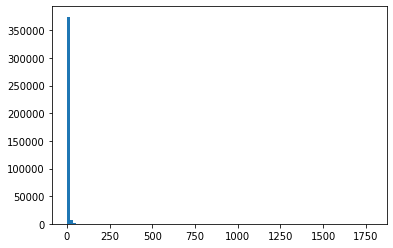

In [49]:
plt.hist(temp[np.where(temp<2000)[0]],bins = 100)
plt.show()

####txn_type: 62 indices have different values - What can we do about it 


In [50]:
Unique_txn_type = Train.groupby('Index').txn_type.unique()
Unique_txn_type

Index
5000000, 10028200    [CROSS BORDER]
5000000, 10072700    [CROSS BORDER]
5000000, 10089800    [CROSS BORDER]
5000000, 10472700    [CROSS BORDER]
5000000, 10670700    [CROSS BORDER]
                          ...      
5742900, 74564200    [CROSS BORDER]
5743300, 74530200        [DOMESTIC]
5743500, 74532600        [DOMESTIC]
5743600, 74560500    [CROSS BORDER]
5743700, 74586600    [CROSS BORDER]
Name: txn_type, Length: 382795, dtype: object

In [51]:
temp = pd.DataFrame(Unique_txn_type)
temp['length'] = temp['txn_type'].apply(lambda x:len(x))
multiple_txn_type = temp[temp.length>1]

In [52]:
multiple_txn_type

,txn_type,length
Index,,
"5011300, 9842500","[DOMESTIC, CROSS BORDER]",2
"5017600, 13247000","[DOMESTIC, CROSS BORDER]",2
"5017600, 13834700","[CROSS BORDER, DOMESTIC]",2
"5017600, 14291700","[DOMESTIC, CROSS BORDER]",2
"5017600, 14298300","[CROSS BORDER, DOMESTIC]",2
...,...,...
"5411600, 39583900","[DOMESTIC, CROSS BORDER]",2
"5411700, 39583900","[DOMESTIC, CROSS BORDER]",2
"5465800, 30119200","[DOMESTIC, CROSS BORDER]",2


In [53]:
multiple_index = multiple_txn_type.index

In [54]:
ratios = []
for i in multiple_index:
  num = 0
  den = 0
  # print(Train.loc[i,'txn_type'].value_counts())
  ratio = Train.loc[i,'txn_type'].value_counts()[0]/Train.loc[i,'txn_type'].value_counts()[1]
  ratios.append(ratio)


In [55]:
pd.Series(ratios).value_counts()

1.0     18
3.0     10
2.0      9
5.0      5
6.0      5
4.0      4
7.0      3
10.0     2
1.5      2
1.6      1
9.2      1
16.0     1
3.5      1
dtype: int64

In [56]:
temp[temp.length>1]

,txn_type,length
Index,,
"5011300, 9842500","[DOMESTIC, CROSS BORDER]",2
"5017600, 13247000","[DOMESTIC, CROSS BORDER]",2
"5017600, 13834700","[CROSS BORDER, DOMESTIC]",2
"5017600, 14291700","[DOMESTIC, CROSS BORDER]",2
"5017600, 14298300","[CROSS BORDER, DOMESTIC]",2
...,...,...
"5411600, 39583900","[DOMESTIC, CROSS BORDER]",2
"5411700, 39583900","[DOMESTIC, CROSS BORDER]",2
"5465800, 30119200","[DOMESTIC, CROSS BORDER]",2


In [57]:
# temp[temp.length>1].to_csv('txn_type.csv')
# files.download('txn_type.csv')

In [58]:
temp.to_csv('txn_type.csv')

In [59]:
# from google.colab import files
# files.download('txn_type.csv')

In [60]:
Train.loc[temp[temp.length>1].index,:].loc[Train.loc[temp[temp.length>1].index,:].payroll_ind==1,:]

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5070600, 10616600",1000006180,9.842014,2021-01-20,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,9.946744,2020-12-21,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,9.639303,2020-10-20,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,1.553521,2020-12-07,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,1.344963,2020-12-18,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,9.580475,2020-09-22,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,9.723215,2020-11-20,DOMESTIC,Financial Institutions,1
"5070600, 10616600",1000006180,1.117779,2020-12-23,CROSS BORDER,Financial Institutions,1


In [61]:
Train.loc[temp[temp.length>1].index,:].loc[Train.loc[temp[temp.length>1].index,:].payroll_ind==0,:].txn_type.value_counts()

CROSS BORDER    199
DOMESTIC        191
Name: txn_type, dtype: int64

In [62]:
len(temp[temp.length>1].index)

62

In [63]:
Train.loc['5011300, 9842500',:]

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5011300, 9842500",1000001070,2.536552,2021-01-19,DOMESTIC,Industrials,0
"5011300, 9842500",1000001070,12.023464,2021-01-19,DOMESTIC,Industrials,0
"5011300, 9842500",1000001070,3.762161,2021-02-17,CROSS BORDER,Industrials,0


In [64]:
Unique_txn_type.apply(lambda x:len(x)).value_counts()

1    382733
2        62
Name: txn_type, dtype: int64

####rem_company_ind: 23 indices have different values - What can we do about it 


In [65]:
Unique_rem_type = Train.groupby('Index').rem_company_ind.unique()
Unique_rem_type

Index
5000000, 10028200                  [Consumer]
5000000, 10072700                  [Consumer]
5000000, 10089800                  [Consumer]
5000000, 10472700                  [Consumer]
5000000, 10670700                  [Consumer]
                               ...           
5742900, 74564200               [Industrials]
5743300, 74530200               [Industrials]
5743500, 74532600               [Industrials]
5743600, 74560500               [Industrials]
5743700, 74586600    [Financial Institutions]
Name: rem_company_ind, Length: 382795, dtype: object

In [66]:
temp = pd.DataFrame(Unique_rem_type)
temp['length'] = temp['rem_company_ind'].apply(lambda x:len(x))
temp[temp.length>1]

,rem_company_ind,length
Index,,
"5022300, 26507400","[Energy, Unknown]",2
"5095400, 15057300","[Technology, Unknown]",2
"5095400, 20151900","[Unknown, Technology]",2
"5095400, 21947000","[Unknown, Technology]",2
"5095400, 49020600","[Unknown, Technology]",2
"5111900, 13928100","[Unknown, Technology]",2
"5111900, 14639600","[Unknown, Technology]",2
"5111900, 20020700","[Unknown, Technology]",2
"5111900, 20842600","[Unknown, Technology]",2


In [67]:
Train.loc[temp[temp.length>1].index,:].payroll_ind.value_counts()

0    67
Name: payroll_ind, dtype: int64

In [68]:
Unique_rem_type.apply(lambda x:len(x)).value_counts()

1    382772
2        23
Name: rem_company_ind, dtype: int64

Exploring Taxation Amount: Possibly substitute mean transaction amount? or mode?

In [69]:
Train.groupby('Index').mean()

,rem_company_id_dummy,txn_amt,payroll_ind
Index,,,
"5000000, 10028200",1000000000,1.066488,0
"5000000, 10072700",1000000000,1.516822,0
"5000000, 10089800",1000000000,2.361373,0
"5000000, 10472700",1000000000,1.053046,0
"5000000, 10670700",1000000000,1.068061,0
...,...,...,...
"5742900, 74564200",1000005090,3.572418,0
"5743300, 74530200",1000038290,1.054750,0
"5743500, 74532600",1000024130,7.023683,0


####Date is the only thing we can explore? 
Testing patterns in payroll vs others 


Testing differences between Payroll and Non Payroll

In [70]:
payroll = Train[Train.payroll_ind==1]

In [71]:
nonpayroll = Train[Train.payroll_ind!=1]

In [72]:
payroll.txn_amt.mean()

4.596752215172051

In [73]:
nonpayroll.txn_amt.mean()
# Non payroll have significantly more txn_amount - so mean might be a pretty good estimator

27.919588785785713

In [74]:
payroll.index.value_counts().value_counts()

6     7163
7     2095
5     1637
1     1308
2     1064
8     1016
12     871
4      790
3      667
9      628
11     618
10     593
13     199
14     143
15     108
16     102
17      56
18      19
19      15
21       8
22       7
20       7
25       6
23       6
24       3
27       3
30       2
26       2
29       2
28       1
33       1
Name: Index, dtype: int64

In [75]:
nonpayroll.index.value_counts().value_counts().head(20)

1     156883
2      60662
5      44481
3      33628
4      24907
6      12717
7       5160
8       3442
9       2680
10      2351
11      1827
12      1598
24      1387
13      1361
14      1104
15       864
16       709
23       649
17       622
18       592
Name: Index, dtype: int64

# Identified Features till this point: 
1) Taxation amount standard deviation 

2) Taxation Type - If there are multiple,put multiple (signifies non payroll)

3) Rem_company_index - If there are multiple,put multiple (signifies non payroll)

4) Count of number of transactions - Large number indicates payroll

5) Average Taxation Amount - More amount indicates non payroll

Now, how to differentiate when the number of transaction is very few (can we use dates?)

In [76]:
payroll.groupby('Index').count()[payroll.groupby('Index').count().txn_amt==10]

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5000100, 11069100",10,10,10,10,10,10
"5000100, 13877900",10,10,10,10,10,10
"5000100, 14208300",10,10,10,10,10,10
"5000100, 15552100",10,10,10,10,10,10
"5000100, 16564900",10,10,10,10,10,10
...,...,...,...,...,...,...
"5220600, 34754300",10,10,10,10,10,10
"5220600, 34978800",10,10,10,10,10,10
"5220600, 41109000",10,10,10,10,10,10


In [77]:
indices = payroll.groupby('Index').count()[payroll.groupby('Index').count().txn_amt==10].index

In [78]:
(Train.loc[indices,:]).groupby('Index').std()

,rem_company_id_dummy,txn_amt,payroll_ind
Index,,,
"5000100, 11069100",0.0,0.086053,0.0
"5000100, 13877900",0.0,0.015494,0.0
"5000100, 14208300",0.0,0.014952,0.0
"5000100, 15552100",0.0,0.019332,0.0
"5000100, 16564900",0.0,0.049096,0.0
...,...,...,...
"5220600, 34754300",0.0,0.786748,0.0
"5220600, 34978800",0.0,0.643856,0.0
"5220600, 41109000",0.0,1.133096,0.0


In [79]:
nonpayroll.groupby('Index').count()[nonpayroll.groupby('Index').count().txn_amt==10]

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5000000, 33043300",10,10,10,10,10,10
"5000000, 61371400",10,10,10,10,10,10
"5000200, 10048300",10,10,10,10,10,10
"5000200, 10064000",10,10,10,10,10,10
"5000200, 10370400",10,10,10,10,10,10
...,...,...,...,...,...,...
"5438900, 38207500",10,10,10,10,10,10
"5492100, 43976200",10,10,10,10,10,10
"5502900, 40061000",10,10,10,10,10,10


In [80]:
indices = nonpayroll.groupby('Index').count()[nonpayroll.groupby('Index').count().txn_amt==10].index

In [81]:
(Train.loc[indices,:]).groupby('Index').std()

,rem_company_id_dummy,txn_amt,payroll_ind
Index,,,
"5000000, 33043300",0.0,0.280222,0.0
"5000000, 61371400",0.0,0.634465,0.0
"5000200, 10048300",0.0,0.264175,0.0
"5000200, 10064000",0.0,7.027407,0.0
"5000200, 10370400",0.0,0.601551,0.0
...,...,...,...
"5438900, 38207500",0.0,5029.058609,0.0
"5492100, 43976200",0.0,56.242528,0.0
"5502900, 40061000",0.0,1.745295,0.0


In [82]:
Train.loc['5000000, 33043300',:]

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5000000, 33043300",1000000000,1.360699,2021-01-07,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.182061,2021-01-11,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.632337,2020-12-15,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.718165,2020-12-28,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.270408,2020-12-18,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.355959,2020-12-30,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.157041,2020-09-28,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.879691,2020-09-28,CROSS BORDER,Consumer,0
"5000000, 33043300",1000000000,1.930021,2020-11-23,CROSS BORDER,Consumer,0


In [83]:
Train.loc['5000100, 11069100',:]

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5000100, 11069100",1000000010,1.194563,2021-01-20,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.224257,2021-01-05,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.016427,2021-02-18,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.140534,2021-02-03,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.055434,2020-12-03,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.229682,2020-09-18,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.152643,2020-10-05,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.289980,2020-10-20,DOMESTIC,Consumer,1
"5000100, 11069100",1000000010,1.106456,2020-11-18,DOMESTIC,Consumer,1


In [84]:
# I am not able to detect clear patterns which differentiate both based on date

#Attempting to add the features one by one

In [85]:
Unique_comp_type = Train.groupby('Index').rem_company_id_dummy.unique()

In [86]:
Unique_comp_type

Index
5000000, 10028200    [1000000000]
5000000, 10072700    [1000000000]
5000000, 10089800    [1000000000]
5000000, 10472700    [1000000000]
5000000, 10670700    [1000000000]
                         ...     
5742900, 74564200    [1000005090]
5743300, 74530200    [1000038290]
5743500, 74532600    [1000024130]
5743600, 74560500    [1000038310]
5743700, 74586600    [1000038320]
Name: rem_company_id_dummy, Length: 382795, dtype: object

In [87]:
temp = pd.DataFrame(Unique_comp_type)
temp['length'] = temp['rem_company_id_dummy'].apply(lambda x:len(x))
temp[temp.length>1]
# No company has length more than 1

,rem_company_id_dummy,length
Index,,


In [88]:
train = Train[~Train.index.duplicated(keep='first')]

In [89]:
train

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind
Index,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0
...,...,...,...,...,...,...
"5001200, 74587500",1000000110,1.044155,2021-01-26,DOMESTIC,Public Sector,0
"5000200, 74587600",1000000020,1.076303,2021-01-29,CROSS BORDER,Communications,0
"5000200, 74587700",1000000020,1.594051,2021-01-29,CROSS BORDER,Communications,0


In [90]:
# Adding the features one by one

In [91]:
train['Average_txn_amount'] = 0
train['Std_txn_amount'] = 0
train['No_of_transactions'] = 0
train['Periodicity'] = 0
train['ID'] = train.index
# We can add more features here

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [92]:
train

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,0,0,0,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,0,0,0,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,0,0,0,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 8000600"
...,...,...,...,...,...,...,...,...,...,...,...
"5001200, 74587500",1000000110,1.044155,2021-01-26,DOMESTIC,Public Sector,0,0,0,0,0,"5001200, 74587500"
"5000200, 74587600",1000000020,1.076303,2021-01-29,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 74587600"
"5000200, 74587700",1000000020,1.594051,2021-01-29,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 74587700"


In [93]:
mean = Train.groupby('Index').mean()
mean.head()

,rem_company_id_dummy,txn_amt,payroll_ind
Index,,,
"5000000, 10028200",1000000000,1.066488,0
"5000000, 10072700",1000000000,1.516822,0
"5000000, 10089800",1000000000,2.361373,0
"5000000, 10472700",1000000000,1.053046,0
"5000000, 10670700",1000000000,1.068061,0


In [94]:
train

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,0,0,0,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,0,0,0,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,0,0,0,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 8000600"
...,...,...,...,...,...,...,...,...,...,...,...
"5001200, 74587500",1000000110,1.044155,2021-01-26,DOMESTIC,Public Sector,0,0,0,0,0,"5001200, 74587500"
"5000200, 74587600",1000000020,1.076303,2021-01-29,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 74587600"
"5000200, 74587700",1000000020,1.594051,2021-01-29,CROSS BORDER,Communications,0,0,0,0,0,"5000200, 74587700"


In [95]:
train['Average_txn_amount'] = train.ID.apply(lambda x: mean.loc[x,'txn_amt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
train.head()

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,1.480575,0,0,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,1.268922,0,0,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,1.190682,0,0,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,5.360628,0,0,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,1.251413,0,0,0,"5000200, 8000600"


In [97]:
count = Train.groupby('Index').count()

In [98]:
train['No_of_transactions'] = train.ID.apply(lambda x: count.loc[x,'txn_amt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
train.head()

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,1.480575,0,3,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,1.268922,0,3,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,1.190682,0,1,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,5.360628,0,7,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,1.251413,0,5,0,"5000200, 8000600"


In [100]:
std = Train.groupby('Index').std()

In [101]:
std.replace(np.nan,0, inplace=True)

In [102]:
train['Std_txn_amount'] = train.ID.apply(lambda x: std.loc[x,'txn_amt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
train.head()

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,1.480575,0.037836,3,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,1.268922,0.131940,3,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,1.190682,0.000000,1,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,5.360628,2.013667,7,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,1.251413,0.116883,5,0,"5000200, 8000600"


In [104]:
company_ind = pd.DataFrame(Train.groupby('Index').rem_company_ind.unique())
company_ind

,rem_company_ind
Index,
"5000000, 10028200",[Consumer]
"5000000, 10072700",[Consumer]
"5000000, 10089800",[Consumer]
"5000000, 10472700",[Consumer]
"5000000, 10670700",[Consumer]
...,...
"5742900, 74564200",[Industrials]
"5743300, 74530200",[Industrials]
"5743500, 74532600",[Industrials]


In [105]:
company_ind.iloc[:,0] = company_ind.iloc[:,0].apply(lambda x:np.sort(x)[0])

In [106]:
train['rem_company_ind'] = train.ID.apply(lambda x: company_ind.loc[x,'rem_company_ind'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
train.head()

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,1.480575,0.037836,3,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,1.268922,0.131940,3,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,1.190682,0.000000,1,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,5.360628,2.013667,7,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,1.251413,0.116883,5,0,"5000200, 8000600"


In [108]:
txn_type = pd.DataFrame(Train.groupby('Index').txn_type.unique())

In [110]:
def calculate_mode(x):
    if len(x) == 1:
        return x[0]
    else:
        return 'Multiple'

In [111]:
txn_type.iloc[:,0] = txn_type.iloc[:,0].apply(lambda x:calculate_mode(x))

In [112]:
train['txn_type'] = train.ID.apply(lambda x: txn_type.loc[x,'txn_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
train.head()

,rem_company_id_dummy,txn_amt,transaction_val_dt,txn_type,rem_company_ind,payroll_ind,Average_txn_amount,Std_txn_amount,No_of_transactions,Periodicity,ID
Index,,,,,,,,,,,
"5000000, 8000000",1000000000,1.458730,2020-09-17,CROSS BORDER,Consumer,0,1.480575,0.037836,3,0,"5000000, 8000000"
"5000200, 8000200",1000000020,1.269716,2020-09-30,CROSS BORDER,Communications,0,1.268922,0.131940,3,0,"5000200, 8000200"
"5000300, 8000300",1000000030,1.190682,2020-09-22,CROSS BORDER,Industrials,0,1.190682,0.000000,1,0,"5000300, 8000300"
"5000500, 8000500",1000000050,5.657271,2020-09-29,CROSS BORDER,Technology,0,5.360628,2.013667,7,0,"5000500, 8000500"
"5000200, 8000600",1000000020,1.239628,2020-09-29,CROSS BORDER,Communications,0,1.251413,0.116883,5,0,"5000200, 8000600"


In [ ]:
train.Periodicity.value_counts()

0    382795
Name: Periodicity, dtype: int64

In [ ]:
# train.loc['5000000, 8000000	','Periodicity'] = 1

In [ ]:
# train.Periodicity.value_counts()

In [ ]:
import pickle

In [ ]:
def fImpReal(data, feature, alpha=0.05):
    print('Importance of variable', feature, '\n')
    x = data[feature]
    y = data['payroll_ind']
    
    x0 = x.loc[y==0]
    x1 = x.loc[y==1]
    
    lev = levene(x0, x1)
    if lev[1]<alpha:
        print('Variance Assumption Invalid: Test Results not Accurate')
    else:
        print('Variance Assumption Valid')
    
    s1 = shapiro(x0)[1]
    s2 = shapiro(x1)[1]
    if s1<alpha or s2<alpha:
        print('Normality Assumption Invalid: Test Results not Accurate\n')
    else:
        print('Normality Assumption Valid\n')
    
    pb = pointbiserialr(y, x)
    print('Point Biserial:', np.round(pb[0], 3))
    if pb[1]>alpha:
        print('Not Important')
    else:
        print('Important')
        
    ktest = kruskal(y, x, nan_policy='omit')
    print('Kruskal-Wallis H-test (No need for normality assumption):', np.round(ktest[0], 3))
    if ktest[1]>alpha:
        print('Not Important')
    else:
        print('Important')
        
    welch = ttest_ind(x0, x1, equal_var=False, nan_policy='omit')
    print('Welch t-Test (No need for variance assumption):', np.round(welch[0], 3))
    if welch[1]>alpha:
        print('Not Important')
    else:
        print('Important --> Checking post-hoc Games Howell test')
        gamesHowell = pg.pairwise_gameshowell(data=data, dv=feature, between='payroll_ind')
        if gamesHowell.iloc[0, :]['pval'] < alpha:
            print('Importance Confirmed')
        else:
            print('Importance Not Confirmed')
        
        
    mann = mannwhitneyu(x0, x1)
    print('Mann-Whitney U Test (No need for normality assumption):', np.round(mann[0], 3))
    if mann[1]>alpha:
        print('Not Important')
    else:
        print('Important')

In [ ]:
fImpReal(train, 'Average_txn_amount', alpha=0.05)

Importance of variable Average_txn_amount 

Variance Assumption Valid
Normality Assumption Invalid: Test Results not Accurate

Point Biserial: -0.001
Not Important


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Kruskal-Wallis H-test (No need for normality assumption): 643102.821
Important
Welch t-Test (No need for variance assumption): 3.89
Important --> Checking post-hoc Games Howell test
Importance Confirmed
Mann-Whitney U Test (No need for normality assumption): 946576343.5
Important


In [ ]:
Train.rem_company_ind.unique()

array(['Consumer', 'Communications', 'Industrials', 'Technology',
       'Public Sector', 'Financial Institutions', 'Healthcare',
       'Alternative Assets', 'Unknown', 'Power', 'Energy', 'Real Estate'],
      dtype=object)

In [ ]:
np.unique(Train.rem_company_ind, return_counts=True)

(array(['Alternative Assets', 'Communications', 'Consumer', 'Energy',
        'Financial Institutions', 'Healthcare', 'Industrials', 'Power',
        'Public Sector', 'Real Estate', 'Technology', 'Unknown'],
       dtype=object),
 array([  3988, 433975, 145665,   5258, 423130,  36492, 136933,  10873,
        104448,   1480, 121806,   6585]))

In [ ]:
np.unique(Train.txn_type, return_counts=True)

In [ ]:
Train[Train.payroll_ind==1].txn_type.count()

In [ ]:
corr = pd.crosstab(Train.txn_type,Train.payroll_ind)

In [ ]:
corr

In [ ]:
Train.payroll_ind.value_counts()[0]

In [ ]:
Train.payroll_ind.value_counts()[1]

In [ ]:
corr = pd.crosstab(Train.rem_company_ind,Train.payroll_ind)

In [ ]:
corr

In [ ]:
corr.loc[:,0] = corr.loc[:,0]/1308694

In [ ]:
corr.loc[:,1] = corr.loc[:,1]/121939

In [ ]:
corr['ratio'] = corr.loc[:,0]/corr.loc[:,1]

In [ ]:
corr

In [ ]:
train_repeating = Train.loc[temp[temp.length>1].index,:]

In [ ]:
train.index.value_counts()